In [25]:
import pandas as pd

# URL of the dataset on GitHub (make sure to use the raw version of the file)
url1 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Alle-uanset-formuetype.xlsx'

# Read the Excel file directly into a pandas DataFrame
averageall = pd.read_excel(url1)

# Display the first few rows of the DataFrame
print(averageall.head())



                       Enhed                           Type             By  \
0  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger      København   
1  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger  Frederiksberg   
2  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger        Brøndby   
3  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger          Ishøj   
4  Median (nominelle priser)  A.1. Helårsbolig, Ejerboliger   Guldborgsund   

  2014 2015 2016 2017 2018 2019  2020  2021  2022  
0    0    0    0    0    0    0     0     0     0  
1    0    0    0    0    0    0     0     0     0  
2    0    0    0    0    0    0     0     0     0  
3    0    0    0    0    0    0     0     0     0  
4    0    0    0    0    0    0     0     0     0  


In [35]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url2 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Antal-personer-i-alt_uasnet-formue.xlsx'

# Read the Excel file directly into a pandas DataFrame
pop = pd.read_excel(url2)

# Display the first few rows of the DataFrame
print(pop.head())


                            Type             By    2014    2015    2016  \
0  A.1. Helårsbolig, Ejerboliger      København  477942  487903  496596   
1  A.1. Helårsbolig, Ejerboliger  Frederiksberg   85124   86215   86528   
2  A.1. Helårsbolig, Ejerboliger        Brøndby   27726   27961   28140   
3  A.1. Helårsbolig, Ejerboliger          Ishøj   16987   17253   17561   
4  A.1. Helårsbolig, Ejerboliger   Guldborgsund   50000   50230   50437   

     2017    2018    2019    2020    2021    2022  
0  505518  514068  521518  527190  533918  542829  
1   85986   85582   85973   85614   85836   86984  
2   28108   27979   27774   27888   28237   29494  
3   17813   17831   17899   18047   18173   18383  
4   50468   50391   50351   50108   50147   50129  


In [27]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url3 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Antal-personer-med-fomruetypen.xlsx'

popmedformue = pd.read_excel(url3)

#showing the first line to make sure our code is good
print(popmedformue.head())

print(popmedformue.columns)

                            Type             By   2014   2015   2016   2017  \
0  A.1. Helårsbolig, Ejerboliger      København  70657  73911  77027  79197   
1  A.1. Helårsbolig, Ejerboliger  Frederiksberg  15930  16418  16734  17107   
2  A.1. Helårsbolig, Ejerboliger        Brøndby   7232   7295   7348   7303   
3  A.1. Helårsbolig, Ejerboliger          Ishøj   5588   5653   5697   5747   
4  A.1. Helårsbolig, Ejerboliger   Guldborgsund  24815  24632  24402  24227   

    2018   2019   2020   2021   2022  
0  83135  85460  86872  88110  88835  
1  17348  17540  17723  17854  17920  
2   7379   7425   7489   7526   7526  
3   5809   5883   5883   5921   5906  
4  24123  24061  23986  24113  24056  
Index(['Type', 'By', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


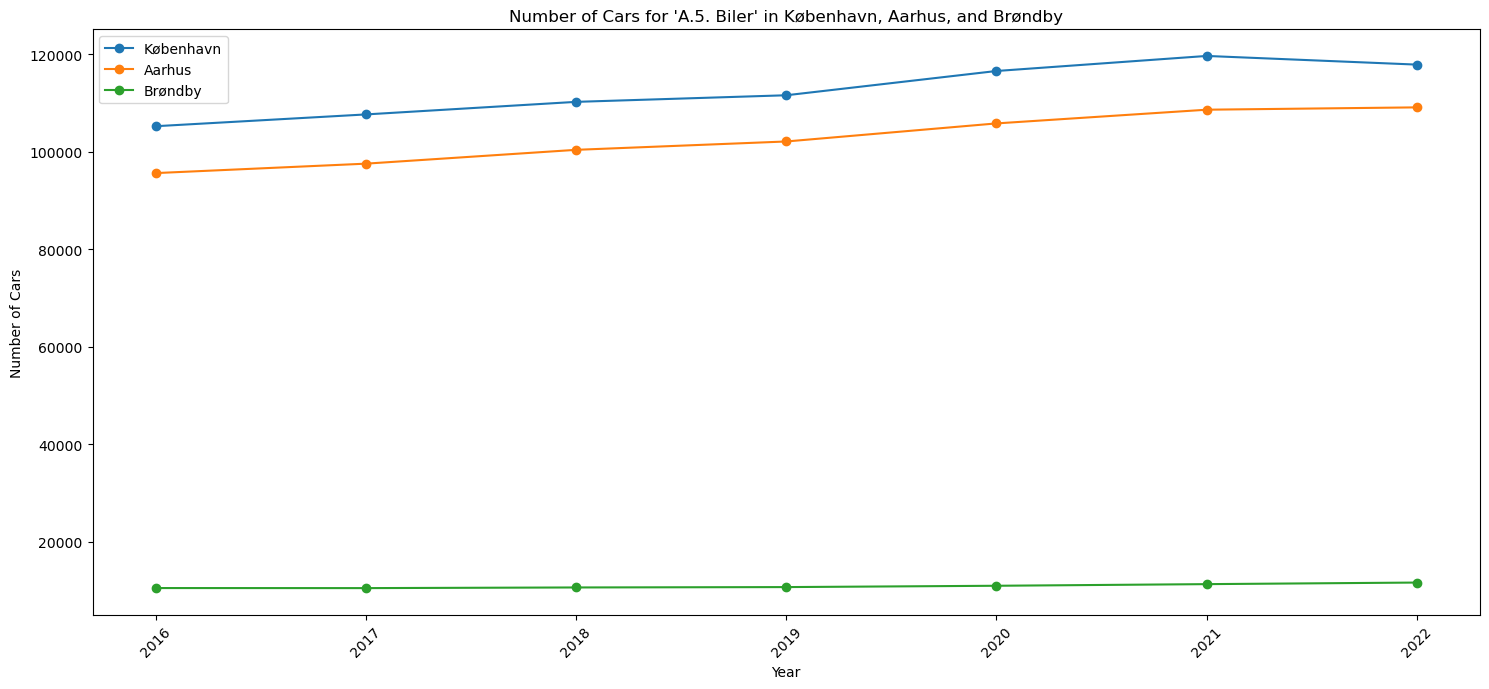

In [29]:
import matplotlib.pyplot as plt

# Specific filters
specific_type = 'A.5. Biler'
specific_cities = ['København', 'Aarhus', 'Brøndby']

# Filter the data
filtered_data = popmedformue[
    (popmedformue['Type'] == specific_type)
]

# Prepare the plot
plt.figure(figsize=(15, 7))

# Plot the data for each city
for city in specific_cities:
    city_data = filtered_data[filtered_data['By'] == city]
    # Assuming the years are the columns '2014' to '2022' in the DataFrame
    years = city_data.columns[4:13]  # Adjust the column indices as necessary
    values = city_data.iloc[0, 4:13].astype(float)  # Convert to float if not already
    plt.plot(years, values, marker='o', label=city)

# Configure the plot
plt.title("Number of Cars for 'A.5. Biler' in København, Aarhus, and Brøndby")
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






København: 88835 cars, 542829 people, ratio: 16.36519051119229%
Aarhus: 93340 cars, 297124 people, ratio: 31.414493612094613%
Brøndby: 7526 cars, 29494 people, ratio: 25.517054316132093%


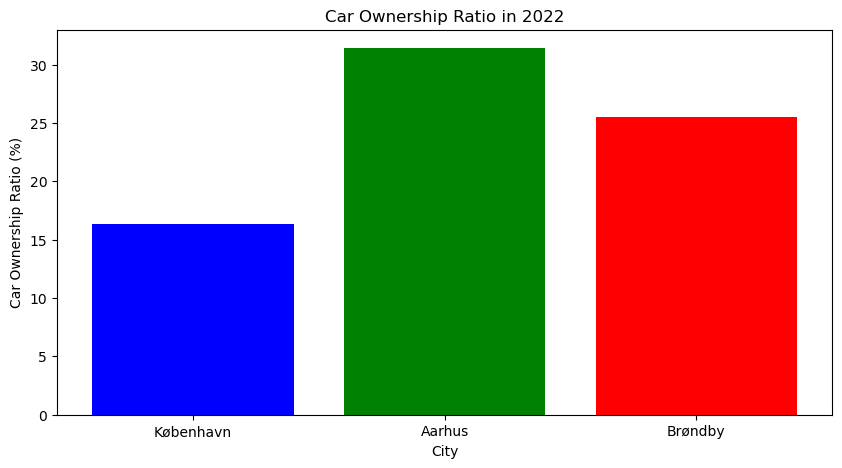

In [38]:
import matplotlib.pyplot as plt

# Assuming popmedformue is the DataFrame with car data and 'pop' is the DataFrame with population data.

# Define the cities and year of interest
specific_cities = ['København', 'Aarhus', 'Brøndby']
year = '2022'

# Check that the data is present for the specific type and cities in both DataFrames
car_data_exists = all(city in popmedformue['By'].values for city in specific_cities)
pop_data_exists = all(city in pop['By'].values for city in specific_cities)

# If data exists, proceed with the merge
if car_data_exists and pop_data_exists:
    # Merge the two datasets on the 'By' column for the year 2022
    merged_data = pd.merge(
        popmedformue[['By', year]],
        pop[['By', year]],
        on='By',
        suffixes=('_cars', '_pop')
    )
    
    # Calculate the car ownership ratios for each city
    car_ownership_ratios = {}
    for city in specific_cities:
        city_data = merged_data[merged_data['By'] == city]
        if not city_data.empty:
            num_cars = city_data[year + '_cars'].iloc[0]
            population = city_data[year + '_pop'].iloc[0]
            car_ownership_ratios[city] = (num_cars / population) * 100  # Convert to percentage
            print(f"{city}: {num_cars} cars, {population} people, ratio: {car_ownership_ratios[city]}%")
        else:
            print(f"No data for {city}")
    
    # Plot the ratios if we have them
    if car_ownership_ratios:
        plt.figure(figsize=(10, 5))
        plt.bar(car_ownership_ratios.keys(), car_ownership_ratios.values(), color=['blue', 'green', 'red'])
        plt.title('Car Ownership Ratio in 2022')
        plt.xlabel('City')
        plt.ylabel('Car Ownership Ratio (%)')
        plt.show()
    else:
        print("No ratios to plot.")
else:
    print("Car data or population data is missing for the specified cities.")


In [40]:
for city in specific_cities:
    car_rows = popmedformue.loc[(popmedformue['By'] == city) & (popmedformue['Type'] == "A.5. Biler"), year]
    pop_rows = pop.loc[(pop['By'] == city) & (pop['Type'] == "Personer i befolkningen d. 31.12 (antal)"), year]
    
    if not car_rows.empty and not pop_rows.empty:
        num_cars = car_rows.values[0]
        population = pop_rows.values[0]
        ratios[city] = (num_cars / population) * 100  # Convert to percentage
    else:
        print(f"Data not found for {city}. Cars: {car_rows}, Population: {pop_rows}")


Data not found for København. Cars: 10    117861
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Aarhus. Cars: 17    109094
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)
Data not found for Brøndby. Cars: 12    11660
Name: 2022, dtype: int64, Population: Series([], Name: 2022, dtype: int64)


In [21]:
# URL of the dataset on GitHub (make sure to use the raw version of the file)
url4 = 'https://raw.githubusercontent.com/NumEconCopenhagen/projects-2024-frederik/main/dataproject/Kun-personer-med-formuetype.xlsx'

averagemedformue = pd.read_excel(url4)

#showing the first line to make sure our code is good
print(averagemedformue.head())

                 ID                      Enhed  \
0  18 år og derover  Median (nominelle priser)   
1  18 år og derover  Median (nominelle priser)   
2  18 år og derover  Median (nominelle priser)   
3  18 år og derover  Median (nominelle priser)   
4  18 år og derover  Median (nominelle priser)   

                              Type             By    2014    2015    2016  \
0  A.2. Helårsbolig, Andelsboliger      København  530591  556678  573883   
1  A.2. Helårsbolig, Andelsboliger  Frederiksberg  759620  793787  821607   
2  A.2. Helårsbolig, Andelsboliger        Brøndby  530469  563111  580830   
3  A.2. Helårsbolig, Andelsboliger          Ishøj  907629  956594  989578   
4  A.2. Helårsbolig, Andelsboliger   Guldborgsund  306248  329976  324933   

      2017     2018     2019     2020     2021     2022  
0   598066   621403   652795   721471   797163   806910  
1   893962   935486   968488  1060696  1162328  1190391  
2   603770   630936   644178   709014   784042   782087  
3  1